In [9]:
## cloning the github where maskRcnn model is build
!git clone https://github.com/matterport/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [10]:
import os
import sys

root_dir=os.path.abspath("/content/Mask_RCNN")
sys.path.append(root_dir)
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN',
 '/',
 '/content/Mask_RCNN']

In [11]:
## we have to install the required library which is mentioned in the given requirement.txt file
!pip install -r /content/Mask_RCNN/requirements.txt

In [ ]:
!pip install opencv-python

In [15]:
!pip install keras==2.0.8

     |████████████████████████████████| 276kB 15.6MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.8 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [28]:
!pip install tensorflow==1.3.0

     |████████████████████████████████| 43.6MB 74kB/s 
     |████████████████████████████████| 1.6MB 43.4MB/s 
     |████████████████████████████████| 890kB 56.0MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107222 sha256=2020a309698cc72813058997fa8127c24aaabc4594a5394e981a21d878b4113a
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.3.0
    Uninstalling bleach-3.3.0:
      Successfully uninstalled bleach-3.3.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [16]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib import rcParams
import cv2
import skimage.io
import keras
import tensorflow

print(keras.__version__)
print(tensorflow.__version__)

Using TensorFlow backend.


2.0.8
1.3.0


In [17]:
## we have to import the python files from the pakage of the mrcnn github 
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

## importing the coco, coco is the datasets where the mrcnn model is trained
sys.path.append(os.path.join(root_dir,"samples/coco"))
import coco

## making a directory where we saved the logs and trained model
model_dir=os.path.join(root_dir, "logs")

## path to trained the weight file
coco_model_path= os.path.join(root_dir,"mask_rcnn_coco.h5")

## download the coco trained model
if not os.path.exists(coco_model_path):
    utils.download_trained_weights(coco_model_path)

In [18]:
img_dir=os.path.join(root_dir,"images")

In [27]:
## GPU configuration
class inferenceConfig(coco.CocoConfig):
    GPU_COUNT=1
    IMAGES_PER_GPU=1

config=inferenceConfig()
config.display()
## we see here the configuration of the image


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [28]:
## creating a model object
model = modellib.MaskRCNN(mode="inference", model_dir=model_dir, config=config)

# Load weights trained on MS-COCO
model.load_weights(coco_model_path, by_name=True)

In [21]:
## In the below class_names are those classes which are present in coco datasets are trained by mrcnn

class_names=['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Processing 1 images
image                    shape: (640, 960, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


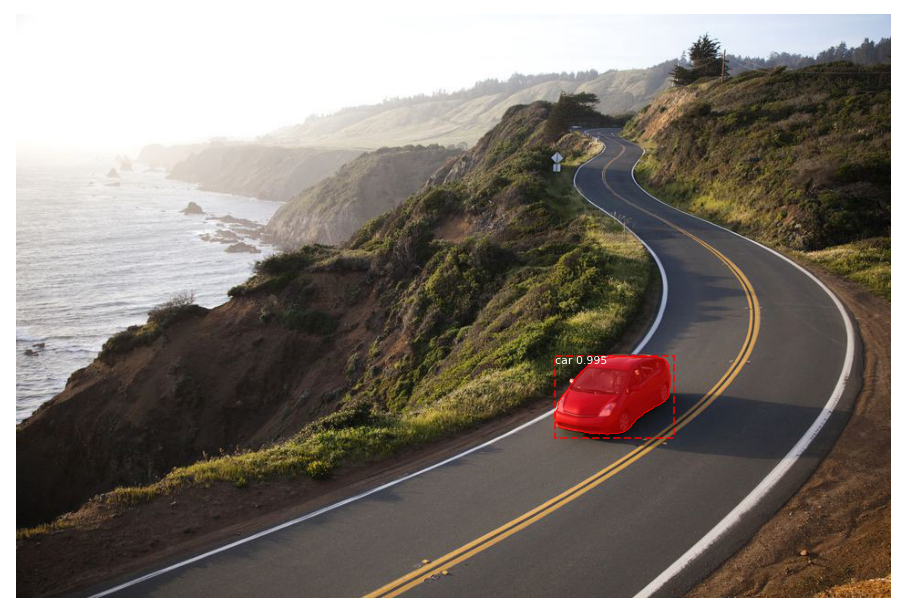

In [30]:
img1=skimage.io.imread("/content/highway_car.jpeg")
result=model.detect([img1],verbose=1)

r=result[0]
visualize.display_instances(img1,r['rois'],r['masks'],r['class_ids'],class_names,r['scores'])

In [31]:
result[0].keys()

dict_keys(['rois', 'class_ids', 'scores', 'masks'])

In [32]:
result[0]

{'class_ids': array([3], dtype=int32), 'masks': array([[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        ...,
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]]), 'rois': array([[374, 591, 464, 722]], dtype=int32), 'scores': array([0.9946355], dtype=float32)}

Processing 1 images
image                    shape: (436, 653, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


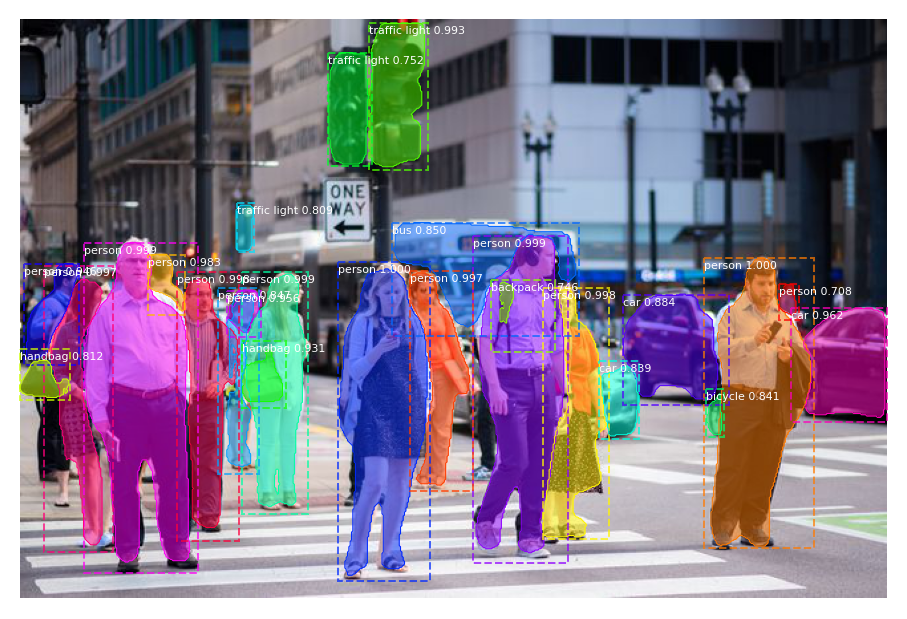

In [33]:
img2=skimage.io.imread('/content/street.jpg')
res=model.detect([img2],verbose=1)
r=res[0]
visualize.display_instances(img2,r['rois'],r['masks'],r['class_ids'],class_names,r['scores'])